In [1]:
import pandas as pd

df = pd.read_csv('chap1-stand_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2400 entries, 0 to 2399
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   icecream_sales     2400 non-null   float64
 1   iced_coffee_sales  2400 non-null   float64
 2   summer_months      2400 non-null   int64  
 3   temps              2400 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 75.1 KB


<Axes: xlabel='temps', ylabel='icecream_sales'>

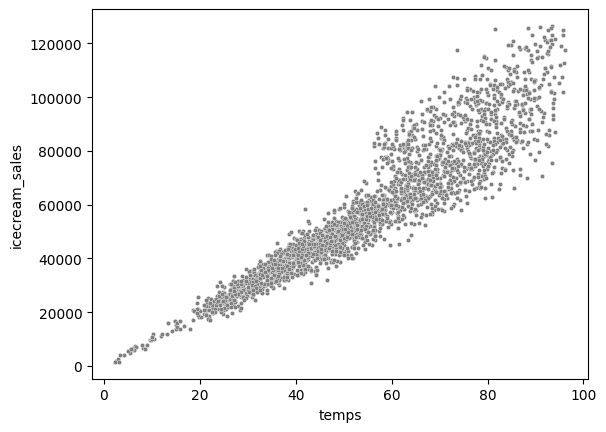

In [2]:
import seaborn as sns
x = df['temps']
y = df['icecream_sales']

sns.scatterplot(x = x, y = y, color = 'gray', s = 10)

In [7]:
from statsmodels.formula.api import ols

model = ols(formula = 'icecream_sales ~ temps', data = df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         icecream_sales   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                 1.684e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        14:15:13   Log-Likelihood:                -25183.
No. Observations:                2400   AIC:                         5.037e+04
Df Residuals:                    2398   BIC:                         5.038e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6169.8442    531.506    -11.608      0.000   -7212.103   -5127.585
temps       1171.3354      9.027    129.762      0.000    1153.634    1189.036
==============================================================================
Omnibus:                      152.269   Durbin-Watson:                   1.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.685
Skew:                           0.519   Prob(JB):                     2.97e-51
Kurtosis:                       4.118   Cond. No.                         176.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
df_survey = pd.read_csv("chap1-survey_data.csv")
df_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   vanilla    10000 non-null  float64
 1   chocolate  10000 non-null  float64
 2   shopped    10000 non-null  int64  
dtypes: float64(2), int64(1)
memory usage: 234.5 KB


<Axes: xlabel='vanilla', ylabel='chocolate'>

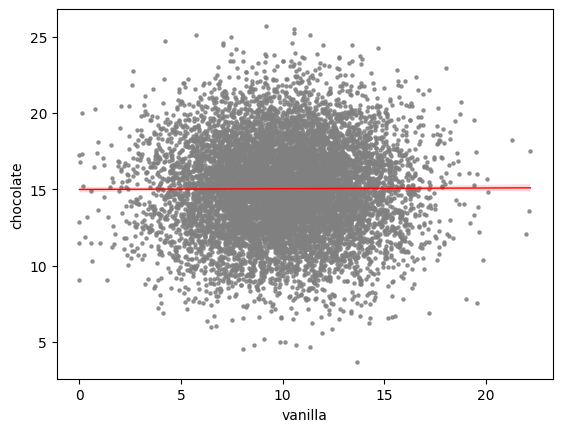

In [20]:
sns.regplot(data = df_survey, x = 'vanilla', y = 'chocolate', 
            scatter_kws = {'s': 5, 'color' : 'gray'} ,
            line_kws = {'color' : 'red', 'lw' : 1})

<Axes: xlabel='shopped', ylabel='vanilla'>

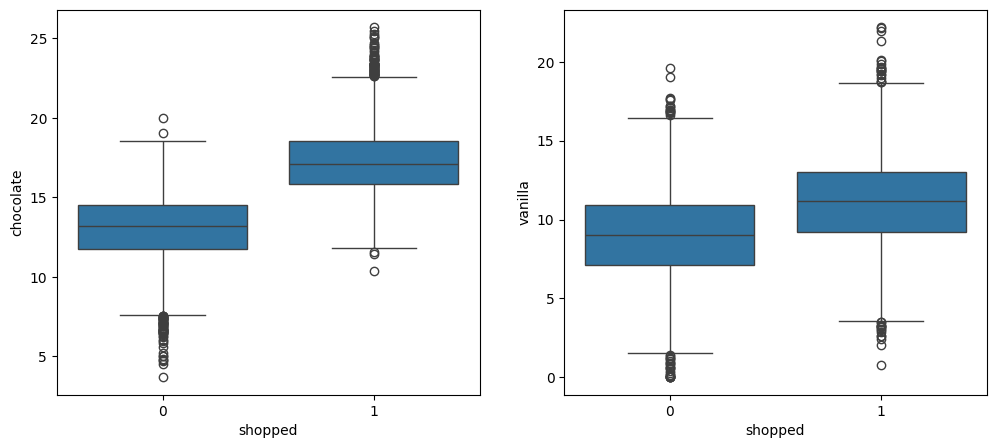

In [23]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (12,5), nrows = 1, ncols = 2)

sns.boxplot(data = df_survey, x = 'shopped', y = 'chocolate', ax = ax[0])
sns.boxplot(data = df_survey, x = 'shopped', y = 'vanilla', ax = ax[1])

In [24]:
import statsmodels.api as sm


x = df_survey['chocolate']
X = sm.add_constant(x)
y = df_survey['shopped']

model = sm.Logit(y,X)
result = model.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.317702
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                shopped   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                  0.5406
Time:                        15:04:36   Log-Likelihood:                -3177.0
converged:                       True   LL-Null:                       -6915.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -18.1772      0.370    -49.174      0.000     -18.902     -17.453
chocolate      1.1909      0.024     49.214      0.000       1.144       1.238
==============================================================================
"""

주어진 코드와 결과에 대해 설명해 드리겠습니다. 코드는 `statsmodels` 라이브러리를 사용하여 로지스틱 회귀 모델을 적합시키는 과정을 보여줍니다. 여기서 사용된 데이터는 `df_survey`라는 데이터프레임이며, 이 데이터프레임에서 `chocolate`이라는 변수(독립변수)와 `shopped`라는 변수(종속변수)를 사용합니다.

### 모델:

모델은 다음과 같은 로지스틱 회귀 모델을 나타냅니다:

\[ \log\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 \times \text{chocolate} \]

여기서,
- \( p \)는 `shopped`의 확률입니다.
- \( \beta_0 \)는 절편(constant)의 계수입니다.
- \( \beta_1 \)는 `chocolate`의 계수입니다.

### 결과 해석:

1. **절편 (const)의 계수 (-18.1772)**:
   - 이 값은 `chocolate`이 0일 때 `shopped`의 로그 오즈(log odds)를 나타냅니다.
   - 절편의 값이 매우 낮다는 것은 `chocolate`이 0일 때 `shopped`의 확률이 매우 낮다는 것을 의미할 수 있습니다 (단, 이 해석은 `chocolate`이 0인 경우가 의미 있을 때에만 적용됩니다).

2. **chocolate의 계수 (1.1909)**:
   - `chocolate`의 계수는 `chocolate` 값의 한 단위 증가가 `shopped`의 로그 오즈에 미치는 영향을 나타냅니다.
   - 이 계수가 양수라는 것은 `chocolate` 값이 증가함에 따라 `shopped`일 확률이 증가한다는 것을 나타냅니다.
   - 즉, `chocolate`과 `shopped` 사이에는 양의 관계가 있음을 의미합니다.

### 추가 고려사항:

- **통계적 유의성**: 결과 요약에는 p-값과 신뢰 구간도 포함되어 있을 것입니다. 이러한 값들은 계수들이 통계적으로 유의한지를 나타냅니다. p-값이 낮으면 해당 계수가 유의하다고 해석할 수 있습니다.
- **모델 적합성**: 로지스틱 회귀 모델의 적합성을 평가하기 위해 모델 요약에는 종종 로그우도(log-likelihood), AIC, BIC 같은 지표들이 포함됩니다. 이러한 지표들은 모델의 전반적인 적합도를 평가하는 데 사용됩니다.
- **변수의 선택**: 모델에 포함된 독립변수가 종속변수를 잘 설명하는지, 혹은 추가 변수가 필요한지 고려해야 합니다.

모델의 해석은 항상 데이터의 맥락과 함께 고려되어야 하며, 통계적 분석 결과만으로 결론을 내리기 전에 전문적인 지식과 데이터에 대한 이해가 필요합니다.